### Algoritmo de Classificação com SVM (Máquina de Vetores de Suporte)
Esse algoritmo encontra uma linha que separe as duas classes.

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [45]:
url = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
df = pd.read_csv(url)

map = {
    "expected_hours": "horas_esperadas",
    "price": "preco",
    "unfinished": "nao_finalizado",
}

df = df.rename(columns=map)

trocar = {
    0: 1,
    1: 0,
}
df["finalizado"] = df.nao_finalizado.map(trocar)

df

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


In [46]:
x = df[["horas_esperadas", "preco"]]
y = df["finalizado"]

SEED = 5
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
modelo = SVC()
modelo.fit(x_train, y_train)
previsoes = modelo.predict(x_test)

acuracia = accuracy_score(y_test, previsoes) * 100
print("A acurária foi de %.2f%%" % acuracia)

print(
    "Proporção para Dados de Treino: %.2f\nProporção para Dados de Teste: %.2f"
    % (
        round(
            y_train.value_counts().to_list()[0] / y_train.value_counts().to_list()[1], 2
        ),
        round(
            y_test.value_counts().to_list()[0] / y_test.value_counts().to_list()[1], 2
        ),
    )
)

A acurária foi de 55.74%
Proporção para Dados de Treino: 1.14
Proporção para Dados de Teste: 1.02


In [47]:
previsoes_de_base = np.ones(540)

acuracia = accuracy_score(y_test, previsoes_de_base) * 100
print("A acurária do algoritmo de baseline foi de %.2f%%" % acuracia)

A acurária do algoritmo de baseline foi de 50.56%


c:\Users\jujun\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


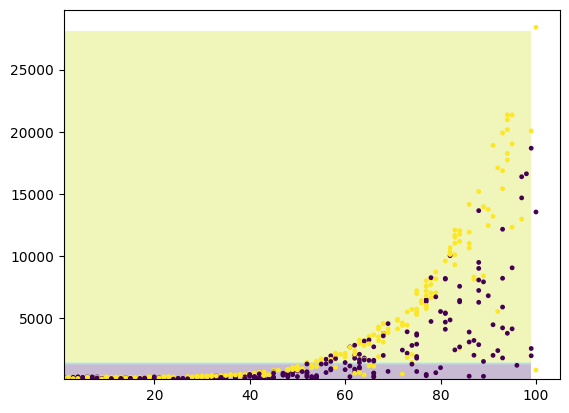

In [48]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.preco.min()
y_max = x_test.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.preco, c=y_test, s=6)

# Decision Boundary

In [49]:
from sklearn.preprocessing import StandardScaler

SEED = 5
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

modelo = SVC()
modelo.fit(x_train, y_train)
previsoes = modelo.predict(x_test)

acuracia = accuracy_score(y_test, previsoes) * 100
print("A acurária foi de %.2f%%" % acuracia)

print(
    "Proporção para Dados de Treino: %.2f\nProporção para Dados de Teste: %.2f"
    % (
        round(
            y_train.value_counts().to_list()[0] / y_train.value_counts().to_list()[1], 2
        ),
        round(
            y_test.value_counts().to_list()[0] / y_test.value_counts().to_list()[1], 2
        ),
    )
)

A acurária foi de 65.00%
Proporção para Dados de Treino: 1.14
Proporção para Dados de Teste: 1.02


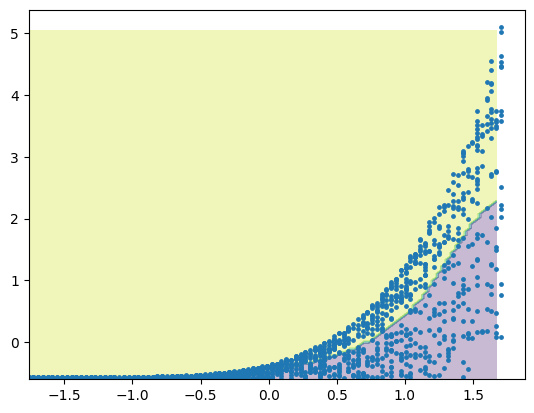

In [51]:
data_x = x_train[:, 0]
data_y = x_train[:, 1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, s=6)

# Decision Boundary